In [1]:
from gymEnvs import *

In [2]:
gym.envs.register(
     id="IsingGym-v0",
     entry_point='__main__:IsingEnv',
     kwargs=dict(n=32,N=64),
)

(2, 2) (2, 2)


C:\Users\sprag\anaconda3\envs\baselines\lib\site-packages\numba\cuda\dispatcher.py:488: NumbaPerformanceWarning: Grid size 4 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
C:\Users\sprag\anaconda3\envs\baselines\lib\site-packages\numba\cuda\dispatcher.py:488: NumbaPerformanceWarning: Grid size 4 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
C:\Users\sprag\anaconda3\envs\baselines\lib\site-packages\numba\cuda\dispatcher.py:488: NumbaPerformanceWarning: Grid size 1 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
C:\Users\sprag\anaconda3\envs\baselines\lib\site-packages\numba\cuda\dispatcher.py:488: NumbaPerformanceWarning: Grid size 4 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


Using cuda device
Wrapping the env in a DummyVecEnv.


C:\Users\sprag\anaconda3\envs\baselines\lib\site-packages\numba\cuda\dispatcher.py:488: NumbaPerformanceWarning: Grid size 1 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
C:\Users\sprag\anaconda3\envs\baselines\lib\site-packages\numba\cuda\dispatcher.py:488: NumbaPerformanceWarning: Grid size 16 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 100      |
|    ep_rew_mean      | -24.1    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1000     |
|    fps              | 506      |
|    time_elapsed     | 197      |
|    total_timesteps  | 100000   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.25     |
|    n_updates        | 12499    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 100      |
|    ep_rew_mean      | -7.38    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2000     |
|    fps              | 418      |
|    time_elapsed     | 477      |
|    total_timesteps  | 200000   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.29     |
|    n_updates      

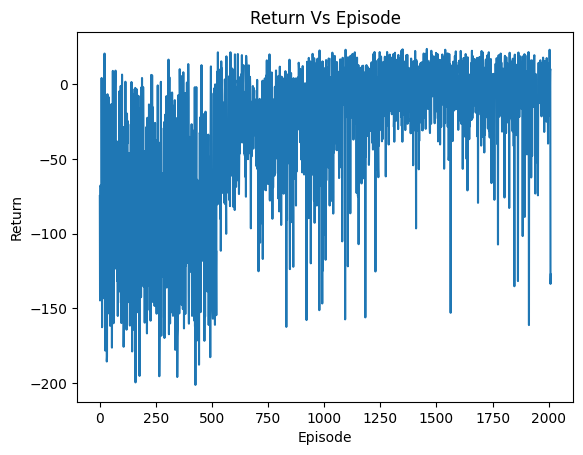

In [3]:
from stable_baselines3 import DQN
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.monitor import Monitor

#Instantiate the easy environment
env = gym.make("IsingGym-v0")

m_env = Monitor(env)

# Instantiate the agent
model = DQN("MlpPolicy", m_env, verbose=1)
# Train the agent and display a progress bar
model.learn(total_timesteps=int(2e5),log_interval=int(1e3))

mean_reward, std_reward = evaluate_policy(model, model.get_env(), n_eval_episodes=10)

print(mean_reward,std_reward)

plt.plot(m_env.get_episode_rewards())
plt.title("Return Vs Episode")
plt.xlabel("Episode")
plt.ylabel("Return")
plt.show()

In [1]:
from gymEnvs import *

gym.envs.register(
     id="Ising-v0",
     entry_point='__main__:IsingEnv',
     max_episode_steps =100,
     kwargs=dict(n=32,N=64,device="cpu"),
)


from ray.tune.registry import register_env

def env_creator(env_config):
    env = IsingEnv(n=32,N=64,device="cpu")
    print(env.spec)
    return env

register_env("IsingEnv-v0", env_creator)

In [2]:
gym.make("Ising-v0")

(2, 2) (2, 2)


<TimeLimit<OrderEnforcing<PassiveEnvChecker<IsingEnv<Ising-v0>>>>>

In [ ]:
from ray.rllib.algorithms.ppo import PPOConfig

config = (  # 1. Configure the algorithm,
    PPOConfig()
    .environment("IsingEnv-v0")
    .rollouts(num_rollout_workers=2)
    .framework("torch")
    .training(model={
        
        "dim": 32,
        
        "conv_filters": [[16, [4, 4], 2], [32, [4, 4], 2], [512, [8, 8], 1]]
        
        
        #"fcnet_hiddens": [64, 64]
    
    
    })
    .evaluation(evaluation_num_workers=1)
)

algo = config.build()  # 2. build the algorithm,

for _ in range(50):
    print(algo.train()["episode_reward_mean"])  # 3. train it,

algo.evaluate()  # 4. and evaluate it.

In [ ]:
for _ in range(150):
    print(algo.train()["episode_reward_mean"])  # 3. train it,
    
    
algo.evaluate()  # 4. and evaluate it.

In [3]:
from ray.rllib.algorithms.dqn.dqn import DQNConfig

config = (  # 1. Configure the algorithm,
    DQNConfig()
    .environment("IsingEnv-v0")
    .training(model={
        
        "dim": 32,
        
        "conv_filters": [[16, [4, 4], 2], [32, [4, 4], 2], [512, [8, 8], 1]]
        
        #"fcnet_hiddens": [64, 64]
    
    })
)

algo = config.build()  # 2. build the algorithm,

for _ in range(10):
    print(algo.train()["episode_reward_mean"])  # 3. train it,

algo.evaluate()  # 4. and evaluate it.

2023-05-16 13:13:34,663	WARNING env.py:155 -- Your env doesn't have a .spec.max_episode_steps attribute. Your horizon will default to infinity, and your environment will not be reset.


None


Install gputil for GPU system monitoring.


-85.15772708754743
-75.64369591795807
-70.40995994307892
-66.48275722602239
-57.77289146126759
-58.89278115204958
-60.4738344602608
-58.99297906080142
-54.6044393540826
-51.322786530685654


{'evaluation': {'episode_reward_max': nan,
  'episode_reward_min': nan,
  'episode_reward_mean': nan,
  'episode_len_mean': nan,
  'episode_media': {},
  'episodes_this_iter': 0,
  'policy_reward_min': {},
  'policy_reward_max': {},
  'policy_reward_mean': {},
  'custom_metrics': {},
  'hist_stats': {'episode_reward': [], 'episode_lengths': []},
  'sampler_perf': {},
  'num_faulty_episodes': 0,
  'connector_metrics': {},
  'num_agent_steps_sampled_this_iter': 10,
  'num_env_steps_sampled_this_iter': 10,
  'timesteps_this_iter': 10}}